In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df=pd.read_csv(r"D:\DMV_pract\Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [77]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

for col in ['area_type', 'availability', 'size']:
    df[col] = label_enc.fit_transform(df[col])

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,Electronic City Phase II,13,Coomee,1056,2.0,1.0,39.07
1,2,80,Chikka Tirupathi,19,Theanmp,2600,5.0,3.0,120.00
2,0,80,Uttarahalli,16,NaN,1440,2.0,3.0,62.00
3,3,80,Lingadheeranahalli,16,Soiewre,1521,3.0,1.0,95.00
4,3,80,Kothanur,13,NaN,1200,2.0,1.0,51.00


In [78]:

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  int32  
 1   availability  13320 non-null  int32  
 2   location      13319 non-null  object 
 3   size          13320 non-null  int32  
 4   society       7818 non-null   object 
 5   total_sqft    13073 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 780.6+ KB


In [80]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,3,40,Electronic City Phase II,13,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,2,80,Chikka Tirupathi,19,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,0,80,Uttarahalli,16,NaN,1440.0,2.0,3.0,62.00,4305.555556
3,3,80,Lingadheeranahalli,16,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,3,80,Kothanur,13,NaN,1200.0,2.0,1.0,51.00,4250.000000


In [81]:
df.isnull().sum()

area_type            0
availability         0
location             1
size                 0
society           5502
total_sqft         247
bath                73
balcony            609
price                0
price_per_sqft     247
dtype: int64

In [82]:
df.drop('society',axis=1,inplace=True)
df['balcony']=df['balcony'].fillna(1)

In [83]:
df.dropna(inplace=True)

In [84]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [85]:
print(df['area_type'].unique())

[3 2 0 1]


In [86]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['location'], dtype='object')


In [87]:
avg_price_by_location = df.groupby('area_type')['price'].mean().reset_index()
print(avg_price_by_location)

   area_type       price
0          0  103.279150
1          1   93.789506
2          2  209.714771
3          3   92.734543


In [88]:
df1=df.copy()

In [89]:
df1.groupby('area_type')['price'].max()

area_type
0    2050.0
1     500.0
2    3600.0
3    2912.0
Name: price, dtype: float64

In [90]:
df1.groupby('size')['price'].max()

size
0      750.0
1      306.0
2       52.0
3      525.0
4     3600.0
5      360.0
6      170.0
7      300.0
8      275.0
9      125.0
10     550.0
11     200.0
12     490.0
13     475.0
14     650.0
15     230.0
16    1015.0
17    2000.0
18    2912.0
19    2600.0
20     660.0
21    2700.0
22    2736.0
23    1000.0
24    2800.0
25    2200.0
26     972.0
27     310.0
28    1900.0
29     500.0
30    1200.0
Name: price, dtype: float64

In [91]:
df1.groupby('location')['price'].max()

location
 Anekal                  16.00
 Banaswadi               35.00
 Basavangudi             50.00
 Bhoganhalli             22.89
 Devarabeesana Halli    160.00
                         ...  
t.c palya               160.00
tc.palya                 78.00
vinayakanagar           200.00
white field,kadugodi    275.00
whitefiled               32.73
Name: price, Length: 1298, dtype: float64

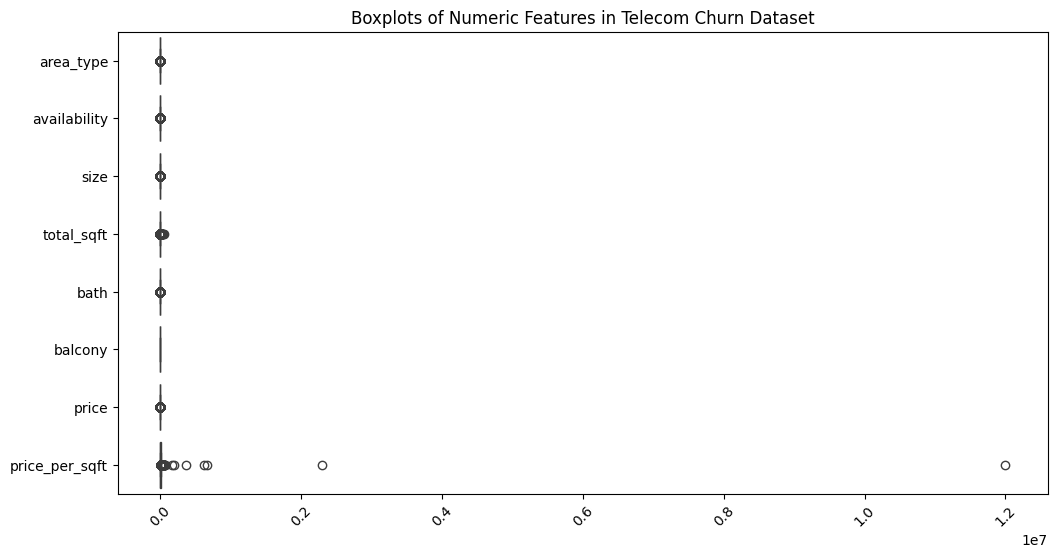

In [92]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['number']),orient='h')
plt.title("Boxplots of Numeric Features in Telecom Churn Dataset")
plt.xticks(rotation=45)
plt.show()

In [93]:

def remove_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    ll = Q1 - 1.5*IQR
    ul = Q3 + 1.5*IQR
    return data[(data[column] >= ll) & (data[column] <= ul)]

for col in ['total_sqft', 'bath', 'price', 'price_per_sqft']:
    df = remove_outliers_iqr(df, col)

df.shape

(10145, 9)

In [94]:

X = df.drop(['price'], axis='columns')
y = df['price']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (10145, 8)
Target Shape: (10145,)


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8116, 8), (8116,), (2029, 8), (2029,))

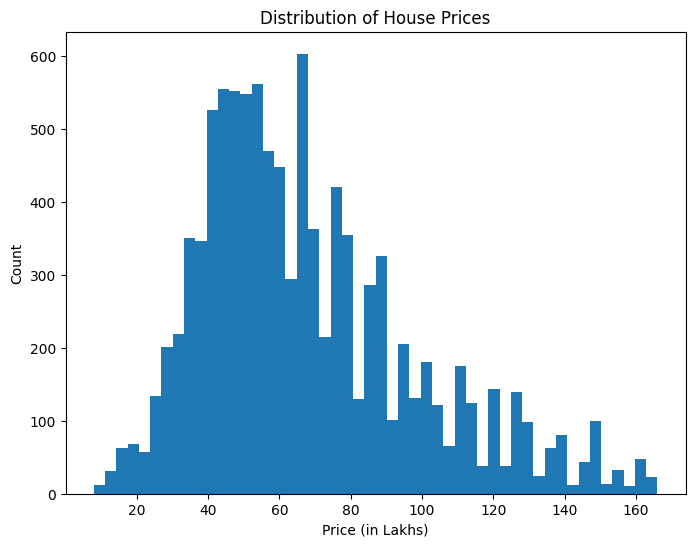

In [96]:
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=50)
plt.xlabel("Price (in Lakhs)")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

C:\Users\aakan\AppData\Local\Temp\ipykernel_12876\2777867120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_prices.index, y=location_prices.values, palette="viridis")


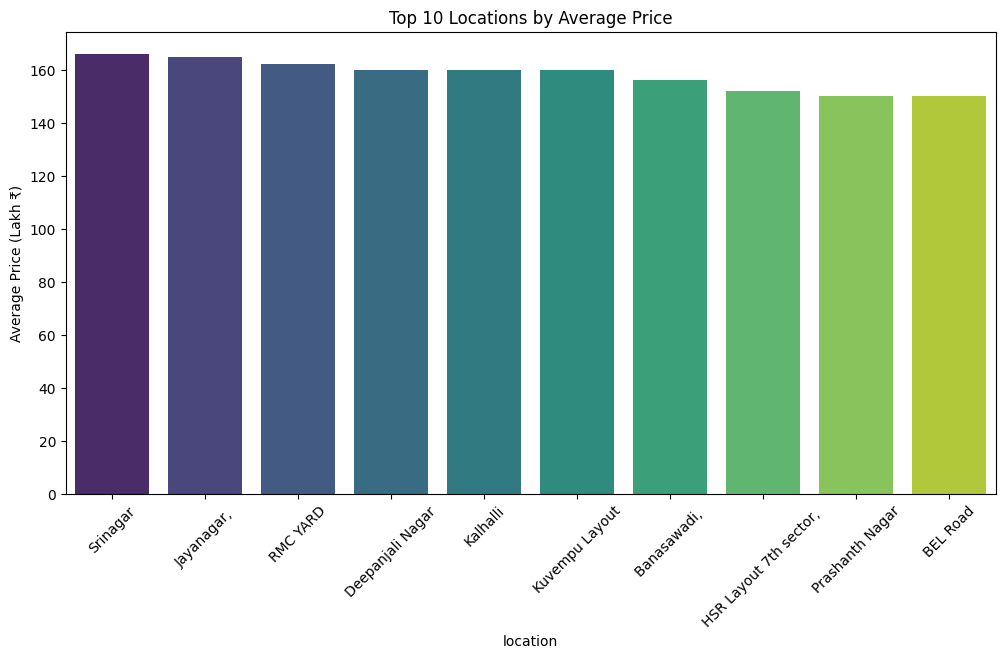

In [72]:
plt.figure(figsize=(12,6))
location_prices = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=location_prices.index, y=location_prices.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Average Price")
plt.ylabel("Average Price (Lakh ₹)")
plt.show()